<a href="https://colab.research.google.com/github/randiijulian/Vegetable-Images-Classification-Model-Deployment/blob/main/Vegetables_Images_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Randi Julian Saputra

Github : github.com/randiijulian

## Final Project Dicoding Pengembangan ML
Image Classification Model Deployment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install split-folders agar mempermudah membagi kategori kebeberapa file
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Library
import zipfile, os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import splitfolders

In [ ]:
#Pastikan Tensorflow versi 2 atau lebih
print(tf.__version__)

2.9.2


In [ ]:
from sklearn.model_selection import train_test_split #Library untuk split data training dan validasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Library untuk augmentasi dan generate gambar
from tensorflow.keras.optimizers import RMSprop #Library untuk optimasi data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
#Library untuk inputan gambar dan grafik
from google.colab import files
from keras.preprocessing import image

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"randijuliansaputra","key":"2f7e1d60b96672fa5ed4a4967c3cc72a"}'}

In [ ]:
# ! chmod 600 /content/kaggle.json

In [ ]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
!ls

100% 534M/534M [00:24<00:00, 24.7MB/s]
100% 534M/534M [00:24<00:00, 23.1MB/s]
drive  kaggle.json  sample_data  vegetable-image-dataset.zip


In [ ]:
#Ekstrasi pada file zip sebelumnya
zip_file = zipfile.ZipFile('/content/vegetable-image-dataset.zip', 'r')
zip_file.extractall('/content')
zip_file.close()

In [ ]:
base_folder = "/content/Vegetable Images/train"
train_folder = "/content/output/train"
validation_folder = "/content/output/val"

In [ ]:
# memisahkan folder dataset menjadi train 80% dan val 20%
splitfolders.ratio(base_folder, output="output", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 15000 files [00:02, 6372.44 files/s]


In [ ]:
# melihat struktur data pada folder train
os.listdir('/content/output/train')

['Capsicum',
 'Potato',
 'Bean',
 'Bitter_Gourd',
 'Cabbage',
 'Cauliflower',
 'Pumpkin',
 'Broccoli',
 'Tomato',
 'Carrot',
 'Radish',
 'Papaya',
 'Brinjal',
 'Cucumber',
 'Bottle_Gourd']

In [ ]:
# melihat struktur data pada folder validation
os.listdir('/content/output/val')

['Capsicum',
 'Potato',
 'Bean',
 'Bitter_Gourd',
 'Cabbage',
 'Cauliflower',
 'Pumpkin',
 'Broccoli',
 'Tomato',
 'Carrot',
 'Radish',
 'Papaya',
 'Brinjal',
 'Cucumber',
 'Bottle_Gourd']

In [ ]:
#Folder train untuk masing-masing label
train_Capsicum = os.path.join(train_folder, "Capsicum")
train_Potato = os.path.join(train_folder, "Potato")
train_Bean = os.path.join(train_folder, "Bean")
train_Bitter_Gourd = os.path.join(train_folder, "Bitter_Gourd")
train_Cabbage = os.path.join(train_folder, "Cabbage")
train_Cauliflower = os.path.join(train_folder, "Cauliflower")
train_Pumpkin = os.path.join(train_folder, "Pumpkin")
train_Broccoli = os.path.join(train_folder, "Broccoli")
train_Tomato = os.path.join(train_folder, "Tomato")
train_Carrot = os.path.join(train_folder, "Carrot")
train_Radish = os.path.join(train_folder, "Radish")
train_Papaya = os.path.join(train_folder, "Papaya")
train_Brinjal = os.path.join(train_folder, "Brinjal")
train_Cucumber = os.path.join(train_folder, "Cucumber")
train_Bottle_Gourd = os.path.join(train_folder, "Bottle_Gourd")

#Folder validation untuk masing masing label
validation_Capsicum = os.path.join(validation_folder, "Capsicum")
validation_Potato = os.path.join(validation_folder, "Potato")
validation_Bean = os.path.join(validation_folder, "Bean")
validation_Bitter_Gourd = os.path.join(validation_folder, "Bitter_Gourd")
validation_Cabbage = os.path.join(validation_folder, "Cabbage")
validation_Cauliflower = os.path.join(validation_folder, "Cauliflower")
validation_Pumpkin = os.path.join(validation_folder, "Pumpkin")
validation_Broccoli = os.path.join(validation_folder, "Broccoli")
validation_Tomato = os.path.join(validation_folder, "Tomato")
validation_Carrot = os.path.join(validation_folder, "Carrot")
validation_Radish = os.path.join(validation_folder, "Radish")
validation_Papaya = os.path.join(validation_folder, "Papaya")
validation_Brinjal = os.path.join(validation_folder, "Brinjal")
validation_Cucumber = os.path.join(validation_folder, "Cucumber")
validation_Bottle_Gourd = os.path.join(validation_folder, "Bottle_Gourd")

In [ ]:
#Augmentasi dan generate gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    zoom_range = 0.1)
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
#Persiapan Data train dan validasi dari folder yang telah dibuat
train_generator = train_datagen.flow_from_directory(
        train_folder,  # folder data train
        target_size=(150, 150),  # scaling gambar menjadi 150*150 px
        batch_size=32,
        class_mode='categorical')  # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
validation_generator = test_datagen.flow_from_directory(
        validation_folder, # folder data validasi
        target_size=(150, 150),  # scaling gambar menjadi 150*150 px
        batch_size=32, 
        class_mode='categorical') # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 12000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
# membangun model CNN untuk klasifikasi gambar
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [ ]:
# Optimize the model use adam
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
#Callback untuk mencegah overfitting dengan menghentikan training, apabila telah terpenuhi
class reduceOverfitting(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\nStopped! Akurasi sudah mencapai 92%")
      self.model.stop_training = True
stop = reduceOverfitting()

In [ ]:
plot = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n//train_generator.batch_size, # 12000 gambar = batch_size * steps
    epochs = 35,
    validation_data = validation_generator,
    validation_steps = validation_generator.n//validation_generator.batch_size, # 3000 gambar = batch_size * steps
    verbose =2, #Menampilkan epoh
    callbacks=[stop] #Memanggil fungsi callbacks apabila hasil akurasi diatas 96%
)

Epoch 1/35
375/375 - 88s - loss: 1.9283 - accuracy: 0.3285 - val_loss: 1.4049 - val_accuracy: 0.4805 - 88s/epoch - 235ms/step
Epoch 2/35
375/375 - 74s - loss: 1.3388 - accuracy: 0.5362 - val_loss: 0.9811 - val_accuracy: 0.6610 - 74s/epoch - 197ms/step
Epoch 3/35
375/375 - 74s - loss: 1.0270 - accuracy: 0.6473 - val_loss: 0.8468 - val_accuracy: 0.7040 - 74s/epoch - 197ms/step
Epoch 4/35
375/375 - 74s - loss: 0.8448 - accuracy: 0.7092 - val_loss: 0.6841 - val_accuracy: 0.7608 - 74s/epoch - 198ms/step
Epoch 5/35
375/375 - 75s - loss: 0.7359 - accuracy: 0.7521 - val_loss: 0.5896 - val_accuracy: 0.8017 - 75s/epoch - 200ms/step
Epoch 6/35
375/375 - 73s - loss: 0.6303 - accuracy: 0.7888 - val_loss: 0.4963 - val_accuracy: 0.8360 - 73s/epoch - 195ms/step
Epoch 7/35
375/375 - 73s - loss: 0.5702 - accuracy: 0.8101 - val_loss: 0.5486 - val_accuracy: 0.8105 - 73s/epoch - 195ms/step
Epoch 8/35
375/375 - 75s - loss: 0.5101 - accuracy: 0.8328 - val_loss: 0.4237 - val_accuracy: 0.8636 - 75s/epoch - 199

In [ ]:
# evaluasi model untuk accuracy dan loss
eval_train = model.evaluate(train_generator)
print("Test Accuracy: %.2f%%" % (eval_train[1]*100))
eval_validation = model.evaluate(validation_generator)
print("Test Validation: %.2f%%" % (eval_validation[1]*100))

375/375 [==============================] - 68s 182ms/step - loss: 0.1832 - accuracy: 0.9425
Test Accuracy: 94.25%
94/94 [==============================] - 5s 54ms/step - loss: 0.1810 - accuracy: 0.9437
Test Validation: 94.37%


Saving 0004.jpg to 0004.jpg
1/1 [==============================] - 0s 15ms/step
0004.jpg
Ini Adalah Tomato


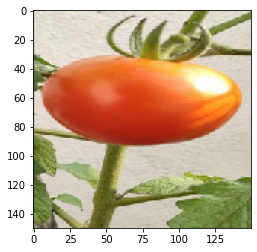

In [ ]:
from tensorflow.keras.preprocessing import image
#Input Gambar
%matplotlib inline
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Predict Images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('Ini Adalah Bean')
  elif classes[0,1]!=0:
    print('Ini Adalah Bitter_Gourd')
  elif classes[0,2]!=0:
    print('Ini Adalah Bottle_Gourd')
  elif classes[0,3]!=0:
    print('Ini Adalah Brinjal')
  elif classes[0,4]!=0:
    print('Ini Adalah Broccoli')
  elif classes[0,5]!=0:
    print('Ini Adalah Cabbage')
  elif classes[0,6]!=0:
    print('Ini Adalah Capsicum')
  elif classes[0,7]!=0:
    print('Ini Adalah Carrot')
  elif classes[0,8]!=0:
    print('Ini Adalah Cauliflower')
  elif classes[0,9]!=0:
    print('Ini Adalah Cucumber')
  elif classes[0,10]!=0:
    print('Ini Adalah Papaya')
  elif classes[0,11]!=0:
    print('Ini Adalah Potato')
  elif classes[0,12]!=0:
    print('Ini Adalah Oumkin')
  elif classes[0,13]!=0:
    print('Ini Adalah Radish')
  else:
    print('Ini Adalah Tomato')

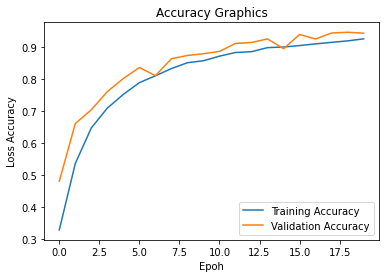

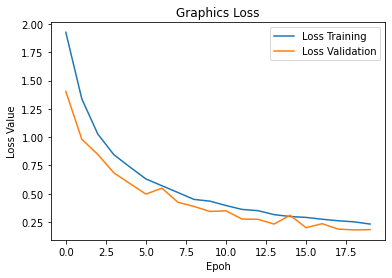

In [ ]:
#Accuracy Plot Grafik
plt.plot(plot.history['accuracy'], label='Training Accuracy')
plt.plot(plot.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graphics')
plt.ylabel('Accuracy')
plt.xlabel('Epoh')
plt.legend(loc="lower right")
plt.show()
print("")
#Loss Plot Grafik
plt.plot(plot.history['loss'], label='Loss Training')
plt.plot(plot.history['val_loss'], label='Loss Validation')
plt.title('Graphics Loss')
plt.ylabel('Loss Value')
plt.xlabel('Epoh')
plt.legend(loc="upper right")
plt.show()

In [ ]:
#Convert to tf lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#save 
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)